# Открытый курс машинного обучения. Тема 2: Визуализация данных c Python 
# https://habrahabr.ru/company/ods/blog/323210/

In [1]:
# Python 2 and 3 compatibility
# pip install future
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%pylab inline

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [22]:
df = pd.read_csv('data/video_games_sales.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [3]:
# Remove movies with missing values

df = df.dropna()
print(df.shape)

(6825, 16)


In [4]:
df[['User_Score']] = df[['User_Score']].astype('float')

In [5]:
# Filter out columns

useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre', 
               'Global_Sales', 'Critic_Score', 'Critic_Count',
               'User_Score', 'User_Count', 'Rating'
              ]
df[useful_cols].head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,82.53,76.0,51.0,8.0,322.0,E
2,Mario Kart Wii,Wii,2008.0,Racing,35.52,82.0,73.0,8.3,709.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,32.77,80.0,73.0,8.0,192.0,E
6,New Super Mario Bros.,DS,2006.0,Platform,29.80,89.0,65.0,8.5,431.0,E
7,Wii Play,Wii,2006.0,Misc,28.92,58.0,41.0,6.6,129.0,E


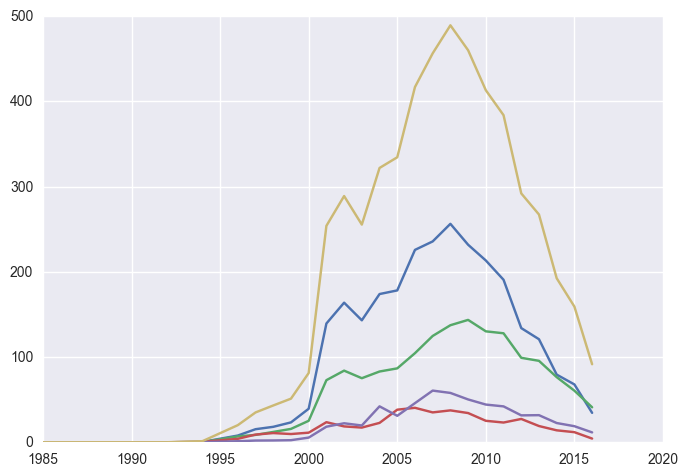

In [6]:
# самый простой и зачастую удобный способ визуализировать 
# данные из pandas dataframe — это воспользоваться функцией plot.

# Для примера построим график продаж видео игр в 
# различных странах в зависимости от года. 
# Для начала отфильтруем только нужные нам столбцы,
# затем посчитаем суммарные продажи по годам и у
# получившегося dataframe вызовем функцию plot без параметров.
import matplotlib.pyplot as plt
sales_df = df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']]
sales_by_year = sales_df.groupby('Year_of_Release').sum()
plt.figure()
plot(sales_by_year)

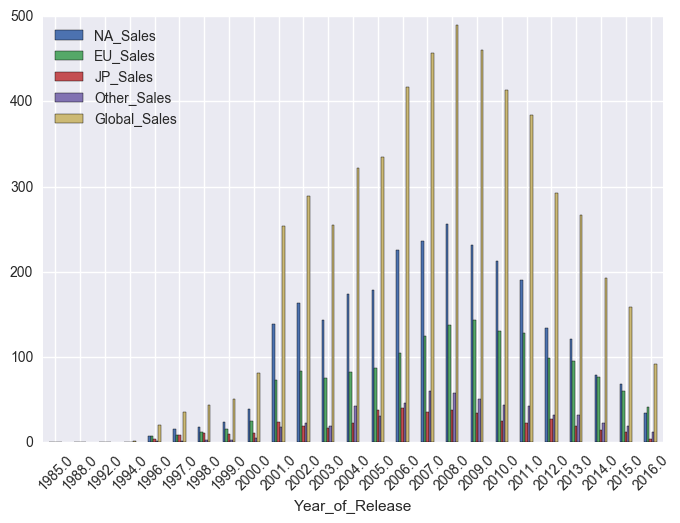

In [7]:
# C помощью параметра kind можно изменить тип графика, например, на bar chart. 
# rot отвечает за угол наклона подписей к оси x.

sales_df.groupby('Year_of_Release').sum().plot(kind='bar', rot=45)

## Seaborn

Seaborn — это по сути более высокоуровневое API на базе библиотеки matplotlib. Seaborn содержит более адекватные дефолтные настройки оформления графиков. Если просто добавить в код import seaborn, то картинки станут гораздо симпатичнее. Также в библиотеке есть достаточно сложные типы визуализации, которые в matplotlib потребовали бы большого количество кода.

### pair plot (scatter plot matrix).
Эта визуализация поможет нам посмотреть на одной картинке, как связаны между собой различные признаки.

In [8]:
cols = ['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
sns_plot = sns.pairplot(df[cols])
sns_plot.savefig('pairplot.png')
%matplotlib inline

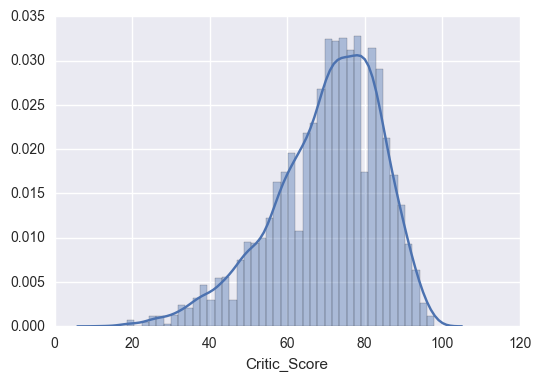

In [9]:
# Show value distribution for a feature
sns.set_style("darkgrid")
sns_plot = sns.distplot(df.Critic_Score)

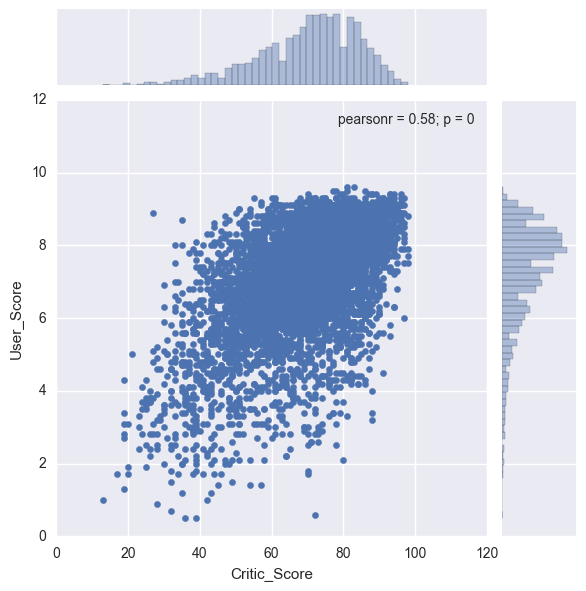

In [10]:
joint_plot = sns.jointplot(df.Critic_Score, df.User_Score)

In [11]:
df[(df.User_Score > 8) & (df.Critic_Score < 50)]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
4193,World Series of Poker,PS2,2005.0,Misc,Activision,0.39,0.01,0.00,0.06,0.47,46.0,15.0,8.2,20.0,Activision,E10+
5825,Shrek Swamp Kart Speedway,GBA,2002.0,Racing,TDK Mediactive,0.22,0.08,0.00,0.01,0.30,27.0,5.0,8.9,19.0,Prolific,E
6087,Monster 4x4: Masters of Metal,PS2,2003.0,Racing,Ubisoft,0.14,0.11,0.00,0.04,0.28,48.0,9.0,8.3,13.0,Ubisoft,E
6419,Lowrider,PS2,2002.0,Misc,Pacific Century Cyber Works,0.11,0.09,0.03,0.03,0.26,46.0,14.0,8.4,11.0,Pacific Century Cyber Works,T
7699,Predator: Concrete Jungle,PS2,2005.0,Action,Vivendi Games,0.10,0.07,0.00,0.03,0.20,47.0,14.0,8.8,76.0,Eurocom Entertainment Software,M
8361,Beat Down: Fists of Vengeance,PS2,2005.0,Action,Capcom,0.04,0.03,0.09,0.01,0.17,48.0,33.0,8.1,12.0,Cavia Inc.,M
9892,Airborne Troops: Countdown to D-Day,PS2,2005.0,Shooter,Playlogic Game Factory,0.06,0.05,0.00,0.02,0.12,39.0,4.0,8.1,9.0,WideScreen Games,T
10721,Star Trek: Shattered Universe,PS2,2004.0,Simulation,Global Star,0.05,0.04,0.00,0.01,0.10,42.0,19.0,8.3,18.0,Starsphere Interactive,E
10992,Fighting Fantasy: The Warlock of Firetop Mountain,DS,2009.0,Role-Playing,Aspyr,0.08,0.00,0.00,0.01,0.09,45.0,10.0,8.1,31.0,Big Blue Bubble Inc.,T
11898,Combat: Task Force 121,XB,2005.0,Shooter,Zoo Digital Publishing,0.05,0.02,0.00,0.00,0.07,44.0,9.0,8.5,4.0,Direct Action Games,M


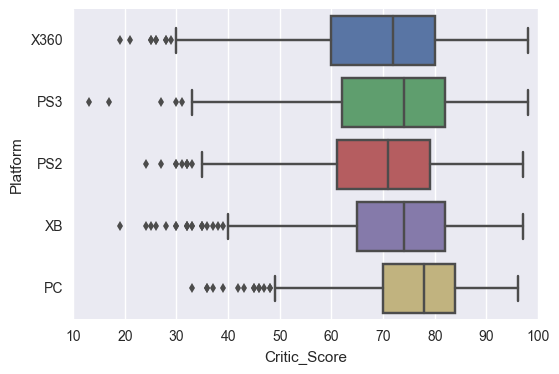

In [12]:
# Еще один полезный тип графиков — это box plot.
#  Давайте сравним оценки игр от критиков для топ-5 крупнейших игровых платформ.

top_platforms = df.Platform.value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(y="Platform", x="Critic_Score", data=df[df.Platform.isin(top_platforms)], orient="h")

In [13]:
# Heat map позволяет посмотреть на распределение какого-то 
# численного признака по двум категориальным. 
# Визуализируем суммарные продажи игр по жанрам и игровым платформам.

platform_genre_sales = df.pivot_table(
                        index='Platform', 
                        columns='Genre', 
                        values='Global_Sales', 
                        aggfunc=sum).fillna(0).applymap(float)
sns_heatmap = sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5)
fig = sns_heatmap.get_figure()
fig.savefig("heatmap.png")

# Plotly — это open-source библиотека, которая позволяет строить интерактивные графики в jupyter.notebook

Прелесть интерактивных графиков заключается в том, что можно посмотреть точное численное значение при наведении мыши, скрыть неинтересные ряды в визуализации, приблизить определенный участок графика и т.д.

In [15]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

<script>requirejs.config({paths: { 'plotly': ['https://cdn.plot.ly/plotly-latest.min']},});if(!window.Plotly) {{require(['plotly'],function(plotly) {window.Plotly=plotly;});}}</script>

In [16]:
# посчитаем число вышедших игр и проданных копий по годам
years_df = df.groupby('Year_of_Release')[['Global_Sales']].sum().join(
    df.groupby('Year_of_Release')[['Name']].count()
)
years_df.columns = ['Global_Sales', 'Number_of_Games']

# создаем линию для числа проданных копий
trace0 = go.Scatter(
    x=years_df.index,
    y=years_df.Global_Sales,
    name='Global Sales'
)

# создаем линию для числа вышедших игр 
trace1 = go.Scatter(
    x=years_df.index,
    y=years_df.Number_of_Games,
    name='Number of games released'
)

# определяем массив данных и задаем title графика в layout
data = [trace0, trace1]
layout = {'title': 'Statistics of video games'}

# cоздаем объект Figure и визуализируем его
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)
plotly.offline.plot(fig, filename='years_stats.html', show_link=False)

<div id="5b4a281b-b133-4f4e-ba8c-799ce55e9b33" style="height: 525px; width: 100%;" class="plotly-graph-div"></div><script type="text/javascript">require(["plotly"], function(Plotly) { window.PLOTLYENV=window.PLOTLYENV || {};window.PLOTLYENV.BASE_URL="https://plot.ly";Plotly.newPlot("5b4a281b-b133-4f4e-ba8c-799ce55e9b33", [{"y": [0.03, 0.03, 0.03, 1.27, 20.099999999999998, 35.01, 43.18, 51.170000000000016, 81.23999999999995, 253.88000000000008, 288.8399999999994, 255.35000000000028, 321.7799999999992, 334.31999999999914, 416.71999999999906, 456.2299999999996, 489.11999999999904, 459.84999999999974, 412.9600000000002, 383.68999999999915, 291.9299999999998, 267.1699999999998, 192.43, 159.16, 91.56000000000004], "type": "scatter", "x": [1985.0, 1988.0, 1992.0, 1994.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0], "name": "Global Sales"}, {"y": [1, 1, 1, 1, 7, 13, 25, 30, 102, 256, 455, 498, 476, 562, 528, 590, 592, 550, 429, 453, 313, 266, 253, 211, 212], "type": "scatter", "x": [1985.0, 1988.0, 1992.0, 1994.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0], "name": "Number of games released"}], {"title": "Statistics of video games"}, {"linkText": "Export to plot.ly", "showLink": false})});</script>

'file://D:\\Projects\\Training\\ML\\MLLib\\years_stats.html'

In [17]:
# Посмотрим также на рыночную долю игровых платформ,
# рассчитанную по количеству выпущенных игр и по суммарной выручке. 
# Для этого построим bar chart.

platforms_df = df.groupby("Platform")[['Global_Sales']].sum().join(
    df.groupby("Platform")[["Name"]].count()
)

platforms_df.columns = ['Global_Sales', 'Number_of_Games']
platforms_df.sort_values('Global_Sales', ascending=False, inplace=True)

In [18]:
platforms_df.index

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS4', 'XB', 'PS', 'PSP', 'PC', 'GC',
       'GBA', 'XOne', '3DS', 'WiiU', 'PSV', 'DC'],
      dtype='object', name='Platform')

In [19]:
# создаем traces для визуализации
trace0 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.Global_Sales,
    name='Global Sales'
)

trace1 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.Number_of_Games,
    name='Number of games released'
)

# создаем массив с данными и задаем title для графика и оси x в layout
data = [trace0, trace1]
layout = {'title': 'Share of platforms', 'xaxis': {'title': 'platform'}}

# создаем объект Figure и визуализируем его
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)
plotly.offline.plot(fig, filename='platform_share.html', show_link=False)

<div id="652130c2-4134-4705-9463-4de05abc1e71" style="height: 525px; width: 100%;" class="plotly-graph-div"></div><script type="text/javascript">require(["plotly"], function(Plotly) { window.PLOTLYENV=window.PLOTLYENV || {};window.PLOTLYENV.BASE_URL="https://plot.ly";Plotly.newPlot("652130c2-4134-4705-9463-4de05abc1e71", [{"y": [945.9699999999991, 853.3000000000002, 784.3000000000008, 658.9800000000001, 382.3299999999998, 243.02999999999994, 212.07000000000045, 206.5500000000002, 187.92000000000021, 187.12000000000089, 159.42000000000056, 131.75000000000017, 129.57000000000002, 123.22999999999993, 66.08, 30.88000000000001, 4.550000000000001], "type": "bar", "x": ["PS2", "X360", "PS3", "Wii", "DS", "PS4", "XB", "PS", "PSP", "PC", "GC", "GBA", "XOne", "3DS", "WiiU", "PSV", "DC"], "name": "Global Sales"}, {"y": [1140, 858, 769, 479, 464, 239, 565, 150, 390, 651, 348, 237, 159, 155, 89, 118, 14], "type": "bar", "x": ["PS2", "X360", "PS3", "Wii", "DS", "PS4", "XB", "PS", "PSP", "PC", "GC", "GBA", "XOne", "3DS", "WiiU", "PSV", "DC"], "name": "Number of games released"}], {"xaxis": {"title": "platform"}, "title": "Share of platforms"}, {"linkText": "Export to plot.ly", "showLink": false})});</script>

'file://D:\\Projects\\Training\\ML\\MLLib\\platform_share.html'

In [37]:
# создаем Box trace для каждого жанра из наших данных
data = []
for genre in df.Genre.unique():
    data.append(
        go.Box(y=df[df.Genre == genre].Critic_Score, name=genre)
    )

# визуализируем данные
iplot(data, show_link = False)
plotly.offline.plot(data, filename='critic_score_boxplot.html', show_link=False)

<div id="976e0861-33cb-45c7-b964-df4eb156f796" style="height: 525px; width: 100%;" class="plotly-graph-div"></div><script type="text/javascript">require(["plotly"], function(Plotly) { window.PLOTLYENV=window.PLOTLYENV || {};window.PLOTLYENV.BASE_URL="https://plot.ly";Plotly.newPlot("976e0861-33cb-45c7-b964-df4eb156f796", [{"name": "Sports", "y": [76.0, 80.0, 80.0, 80.0, 82.0, 85.0, 86.0, 73.0, 82.0, 89.0, 92.0, 88.0, 98.0, 91.0, 84.0, 97.0, 86.0, 84.0, 80.0, 95.0, 81.0, 90.0, 87.0, 91.0, 76.0, 81.0, 94.0, 82.0, 91.0, 88.0, 88.0, 84.0, 83.0, 83.0, 94.0, 87.0, 88.0, 93.0, 93.0, 67.0, 85.0, 81.0, 85.0, 89.0, 78.0, 84.0, 84.0, 80.0, 90.0, 90.0, 90.0, 84.0, 79.0, 87.0, 78.0, 83.0, 83.0, 87.0, 50.0, 90.0, 83.0, 84.0, 77.0, 83.0, 85.0, 83.0, 42.0, 85.0, 86.0, 66.0, 78.0, 82.0, 79.0, 80.0, 81.0, 82.0, 62.0, 90.0, 84.0, 64.0, 86.0, 80.0, 81.0, 90.0, 87.0, 69.0, 85.0, 88.0, 76.0, 86.0, 70.0, 87.0, 80.0, 82.0, 81.0, 92.0, 82.0, 91.0, 87.0, 67.0, 93.0, 90.0, 87.0, 94.0, 44.0, 93.0, 78.0, 83.0, 83.0, 88.0, 92.0, 89.0, 88.0, 77.0, 76.0, 69.0, 83.0, 74.0, 90.0, 80.0, 38.0, 69.0, 87.0, 82.0, 81.0, 38.0, 84.0, 91.0, 67.0, 82.0, 76.0, 85.0, 88.0, 91.0, 59.0, 80.0, 81.0, 88.0, 81.0, 79.0, 84.0, 82.0, 90.0, 93.0, 73.0, 63.0, 66.0, 84.0, 85.0, 30.0, 79.0, 68.0, 85.0, 86.0, 52.0, 76.0, 83.0, 82.0, 80.0, 89.0, 73.0, 92.0, 68.0, 83.0, 95.0, 57.0, 77.0, 88.0, 83.0, 62.0, 74.0, 81.0, 86.0, 75.0, 77.0, 97.0, 92.0, 84.0, 73.0, 76.0, 88.0, 70.0, 89.0, 71.0, 89.0, 82.0, 70.0, 80.0, 81.0, 82.0, 65.0, 72.0, 90.0, 83.0, 79.0, 82.0, 80.0, 75.0, 82.0, 87.0, 81.0, 85.0, 81.0, 85.0, 85.0, 69.0, 63.0, 83.0, 47.0, 83.0, 79.0, 79.0, 90.0, 83.0, 86.0, 80.0, 87.0, 78.0, 76.0, 86.0, 81.0, 80.0, 78.0, 70.0, 74.0, 85.0, 68.0, 76.0, 83.0, 77.0, 85.0, 80.0, 80.0, 86.0, 76.0, 69.0, 81.0, 83.0, 81.0, 88.0, 72.0, 85.0, 83.0, 84.0, 86.0, 77.0, 82.0, 82.0, 78.0, 91.0, 83.0, 78.0, 78.0, 73.0, 80.0, 72.0, 74.0, 87.0, 83.0, 82.0, 55.0, 81.0, 81.0, 70.0, 81.0, 94.0, 81.0, 82.0, 83.0, 75.0, 76.0, 87.0, 79.0, 88.0, 79.0, 64.0, 68.0, 79.0, 79.0, 83.0, 77.0, 90.0, 91.0, 92.0, 86.0, 75.0, 68.0, 77.0, 83.0, 82.0, 89.0, 81.0, 86.0, 85.0, 40.0, 82.0, 89.0, 89.0, 82.0, 80.0, 81.0, 65.0, 61.0, 74.0, 88.0, 83.0, 63.0, 82.0, 84.0, 80.0, 50.0, 79.0, 85.0, 84.0, 78.0, 73.0, 88.0, 82.0, 88.0, 78.0, 76.0, 77.0, 82.0, 89.0, 48.0, 80.0, 73.0, 82.0, 72.0, 46.0, 70.0, 79.0, 64.0, 86.0, 60.0, 72.0, 69.0, 60.0, 44.0, 88.0, 73.0, 90.0, 72.0, 73.0, 81.0, 90.0, 84.0, 86.0, 79.0, 91.0, 78.0, 70.0, 85.0, 86.0, 88.0, 56.0, 77.0, 66.0, 78.0, 63.0, 55.0, 77.0, 68.0, 72.0, 91.0, 81.0, 88.0, 76.0, 93.0, 81.0, 80.0, 80.0, 75.0, 84.0, 81.0, 87.0, 89.0, 80.0, 81.0, 46.0, 78.0, 78.0, 78.0, 78.0, 63.0, 81.0, 79.0, 73.0, 90.0, 76.0, 75.0, 80.0, 90.0, 81.0, 94.0, 64.0, 76.0, 85.0, 82.0, 76.0, 71.0, 82.0, 77.0, 88.0, 59.0, 68.0, 80.0, 82.0, 81.0, 81.0, 84.0, 78.0, 80.0, 78.0, 80.0, 81.0, 72.0, 69.0, 70.0, 76.0, 69.0, 59.0, 89.0, 66.0, 75.0, 69.0, 83.0, 80.0, 85.0, 84.0, 50.0, 70.0, 89.0, 58.0, 69.0, 88.0, 73.0, 73.0, 88.0, 88.0, 76.0, 81.0, 71.0, 92.0, 88.0, 74.0, 81.0, 76.0, 78.0, 70.0, 88.0, 80.0, 84.0, 65.0, 76.0, 77.0, 59.0, 84.0, 62.0, 79.0, 68.0, 87.0, 81.0, 76.0, 67.0, 69.0, 71.0, 75.0, 49.0, 92.0, 79.0, 68.0, 53.0, 86.0, 51.0, 77.0, 70.0, 52.0, 92.0, 73.0, 70.0, 73.0, 68.0, 66.0, 80.0, 84.0, 74.0, 85.0, 85.0, 66.0, 73.0, 59.0, 73.0, 75.0, 58.0, 83.0, 91.0, 59.0, 53.0, 31.0, 77.0, 69.0, 79.0, 85.0, 81.0, 83.0, 85.0, 45.0, 75.0, 88.0, 78.0, 75.0, 77.0, 70.0, 79.0, 60.0, 83.0, 88.0, 74.0, 26.0, 71.0, 60.0, 89.0, 75.0, 63.0, 85.0, 78.0, 70.0, 87.0, 74.0, 63.0, 50.0, 77.0, 70.0, 72.0, 59.0, 67.0, 71.0, 73.0, 82.0, 52.0, 73.0, 63.0, 77.0, 72.0, 72.0, 88.0, 64.0, 60.0, 72.0, 76.0, 68.0, 83.0, 80.0, 82.0, 58.0, 56.0, 82.0, 76.0, 56.0, 80.0, 57.0, 82.0, 55.0, 78.0, 65.0, 79.0, 67.0, 61.0, 79.0, 89.0, 62.0, 84.0, 79.0, 78.0, 41.0, 63.0, 87.0, 75.0, 56.0, 61.0, 68.0, 78.0, 44.0, 77.0, 53.0, 79.0, 58.0, 68.0, 89.0, 46.0, 80.0, 53.0, 79.0, 87.0, 57.0, 56.0, 74.0, 71.0, 51.0, 80.0, 64.0, 83.0, 77.0, 64.0, 87.0, 77.0, 43.0, 51.

'file://D:\\Projects\\Training\\ML\\MLLib\\critic_score_boxplot.html'

In [23]:
# Проанализируем Telecom датасет из первого занятия

df = pd.read_csv("data/telecom-churn.csv")

In [24]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [25]:
df.shape

(3333, 21)

In [26]:
# Нет ли пропусков?

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

In [27]:
# Посмотрим на распределение по классам - отвалившиеся\оставшиеся

df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

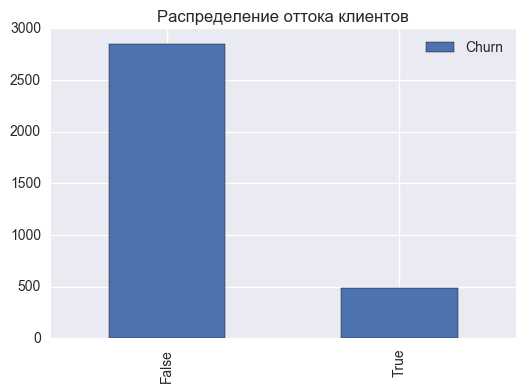

In [28]:
# А теперь отобразим это на графике
sns.set_style("darkgrid")
df['churn'].value_counts().plot(kind='bar', label='Churn')
plt.legend()
plt.title('Распределение оттока клиентов');

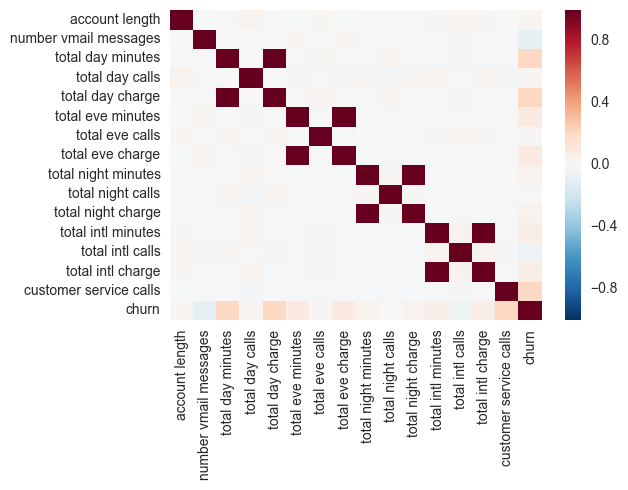

In [29]:
corr_matrix = df.drop(['state', 'international plan', 'voice mail plan',
                      'area code'], axis=1).corr()
plot = sns.heatmap(corr_matrix)
plot.get_figure()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000242D5216EB8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000242D5632128>]], dtype=object)

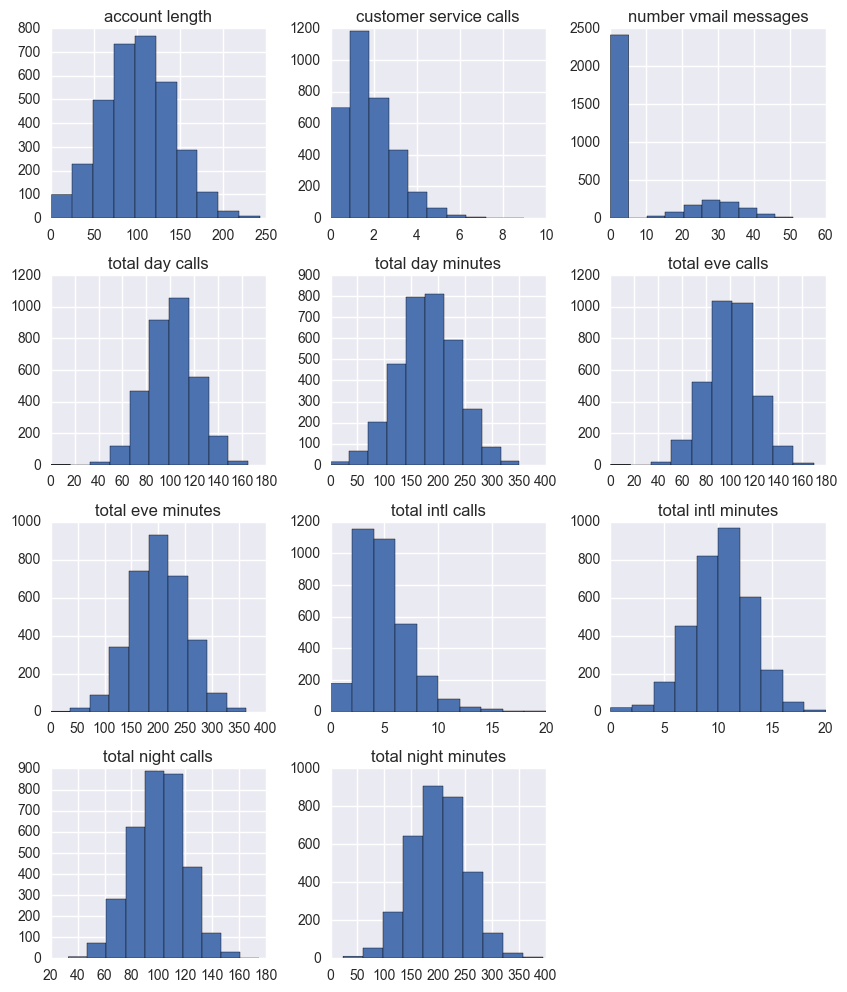

In [31]:
# Анализируем количественные признаки 

features = list(set(df.columns) - set(['state', 'international plan', 'voice mail plan',  'area code',
                                      'total day charge',   'total eve charge',   'total night charge',
                                        'total intl charge', 'churn']))

df[features].hist(figsize=(10, 12))

In [32]:
sns.pairplot(df[features + ['churn']], hue='churn')

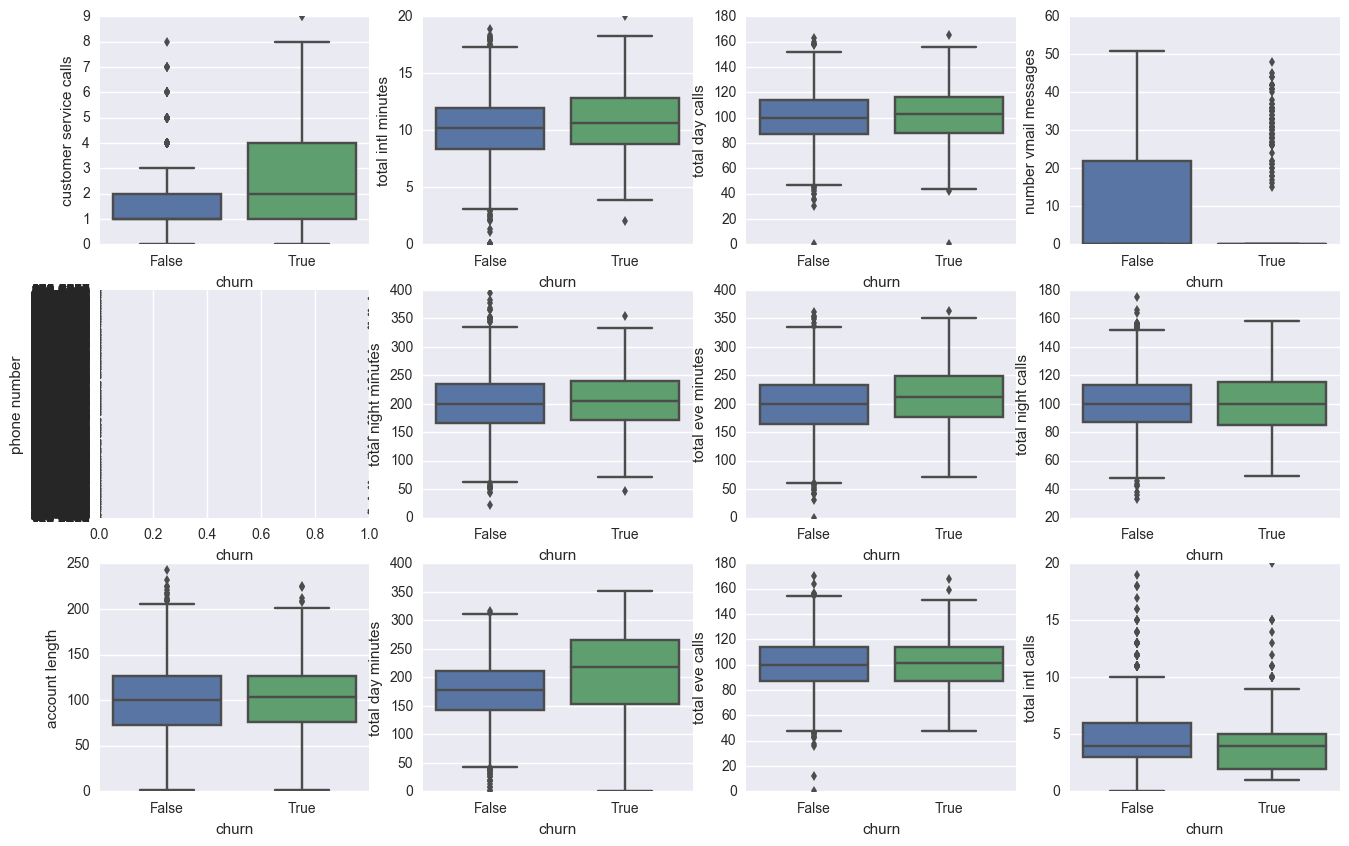

In [34]:
# Построим boxplot-ы, описывающее статистики 
# распределения количественных признаков в двух группах:
#  среди лояльных и ушедших клиентов.

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))
for idx, feat in enumerate(features):
    sns.boxplot(x='churn', y=feat, data=df, ax=axes[idx / 4, idx % 4]).get_figure()
    axes[idx / 4, idx % 4].legend()
    axes[idx / 4, idx % 4].set_xlabel('churn')
    axes[idx / 4, idx % 4].set_ylabel(feat)

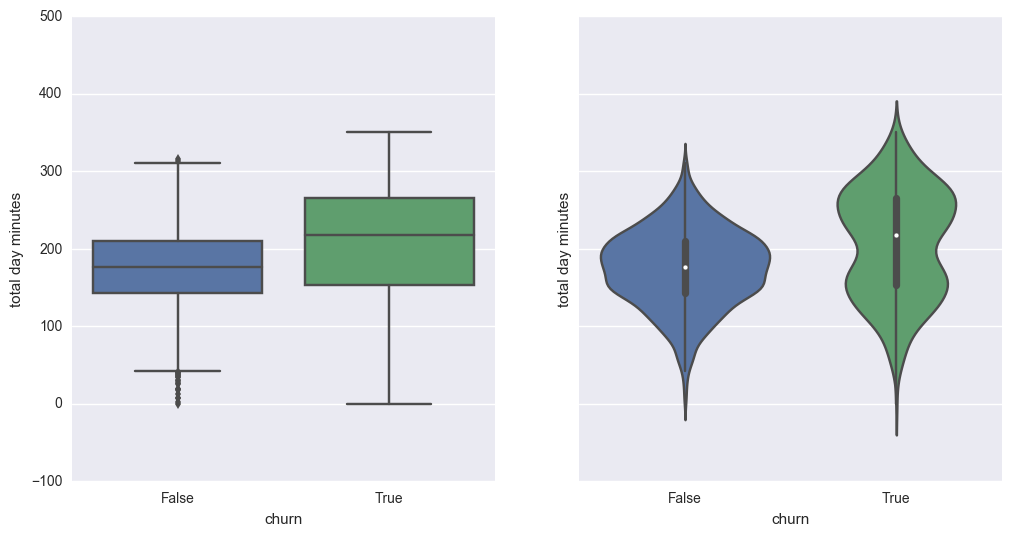

In [35]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12,6))

sns.boxplot(x='churn', y='total day minutes', data=df, ax=axes[0]);
sns.violinplot(x='churn', y='total day minutes', data=df, ax=axes[1]);

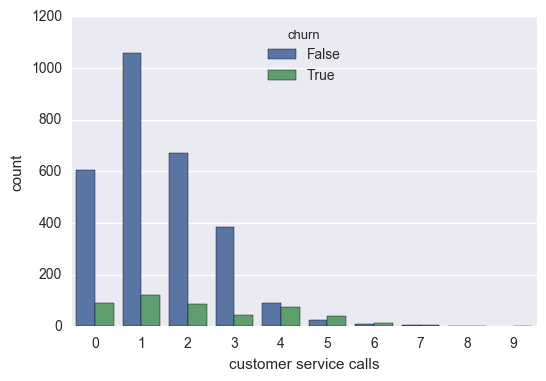

In [36]:
sns.countplot(x='customer service calls', hue='churn', data=df)

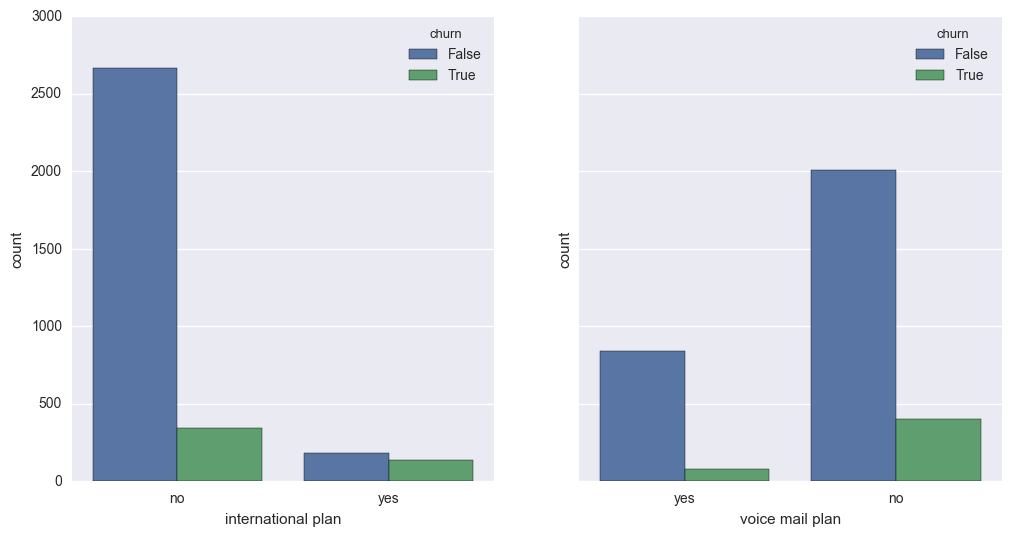

In [72]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 6))

sns.countplot(x='international plan', hue='churn', data=df, ax=axes[0])
sns.countplot(x='voice mail plan', hue='churn', data=df, ax=axes[1])

In [75]:
df.groupby(['state'])['churn'].agg([np.mean]).sort_values(by='mean', ascending=False).T

state,NJ,CA,TX,MD,SC,MI,MS,NV,WA,ME,...,RI,WI,IL,NE,LA,IA,VA,AZ,AK,HI
mean,0.264706,0.264706,0.25,0.242857,0.233333,0.219178,0.215385,0.212121,0.212121,0.209677,...,0.092308,0.089744,0.086207,0.081967,0.078431,0.068182,0.064935,0.0625,0.057692,0.056604


## Подглядывание в n-мерное пространство с t-SNE

http://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf

основная идея проста, как дверь: найдем такое отображение из многомерного признакового пространства на плоскость (или в 3D, но почти всегда выбирают 2D), чтоб точки, которые были далеко друг от друга, на плоскости тоже оказались удаленными, а близкие точки – также отобразились на близкие. То есть neighbor embedding – это своего рода поиск нового представления данных, при котором сохраняется соседство.

Немного деталей: выкинем штаты и признак оттока, бинарные Yes/No-признаки переведем в числа (pd.factorize). Также нужно масштабировать выборку – из каждого признака вычесть его среднее и поделить на стандартное отклонение, это делает StandardScaler.

In [40]:
X

,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,128,415,382-4657,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,371-7191,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,358-1921,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,375-9999,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,330-6626,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
5,118,510,391-8027,1,1,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
6,121,510,355-9993,0,0,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3
7,147,415,329-9001,1,1,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0
8,117,408,335-4719,0,1,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1
9,141,415,330-8173,1,0,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0


In [41]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# преобразуем все признаки в числовые, выкинув штаты
X = df.drop(['churn', 'state', 'phone number'], axis=1)
X['international plan'] = pd.factorize(X['international plan'])[0]
X['voice mail plan'] = pd.factorize(X['voice mail plan'])[0]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [42]:
%%time
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(X_scaled)

Wall time: 27.4 s


In [56]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1])

In [64]:
# Раскрасим полученное t-SNE представление данных по оттоку (зеленые – лояльные, красные – ушедшие клиенты).

plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=df['churn'].map({0: 'green', 1: 'red'}))
plt.savefig("tsne.png")

In [70]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))

axes[0].scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=df['international plan'].map({'yes': 'green', 'no': 'red'}))
axes[1].scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=df['voice mail plan'].map({'yes': 'green', 'no': 'red'}))
axes[0].set_title('international plan')
axes[1].set_title('voice mail plan')

plt.savefig("tsne.png")